In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('disney_plus_titles.txt')
df.to_csv()
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,A Spark Story,"Jason Sterman, Leanne Dare","Apthon Corbin, Louis Gonzales",NaN,"September 24, 2021",2021,TV-PG,88 min,Documentary,Two Pixar filmmakers strive to bring their uni...
1,s2,Movie,Spooky Buddies,Robert Vince,"Tucker Albrizzi, Diedrich Bader, Ameko Eks Mas...","United States, Canada","September 24, 2021",2011,G,93 min,"Comedy, Fantasy, Kids",The puppies go on a spooky adventure through a...
2,s3,Movie,The Fault in Our Stars,Josh Boone,"Shailene Woodley, Ansel Elgort, Laura Dern, Sa...",United States,"September 24, 2021",2014,PG-13,127 min,"Coming of Age, Drama, Romance",Hazel and Gus share a love that sweeps them on...
3,s4,TV Show,Dog: Impossible,NaN,Matt Beisner,United States,"September 22, 2021",2019,TV-PG,2 Seasons,"Animals & Nature, Docuseries, Family",Matt Beisner uses unique approaches to modifyi...
4,s5,TV Show,Spidey And His Amazing Friends,NaN,"Benjamin Valic, Lily Sanfelippo, Jakari Fraser...",United States,"September 22, 2021",2021,TV-Y,1 Season,"Action-Adventure, Animation, Kids",Spidey teams up with pals to become The Spidey...
...,...,...,...,...,...,...,...,...,...,...,...,...
1363,s1364,Movie,The Sword in the Stone,Wolfgang Reitherman,"Sebastian Cabot, Karl Swenson, Rickie Sorensen...",United States,"October 1, 2019",1963,G,80 min,"Action-Adventure, Animation, Comedy",Merlin trains a young orphan who's destined to...
1364,s1365,Movie,Those Calloways,Norman Tokar,"Brian Keith, Vera Miles, Brandon de Wilde, Wal...",United States,"October 1, 2019",1965,PG,132 min,"Animals & Nature, Drama, Family",A strong-willed family struggles to establish ...
1365,s1366,TV Show,Disney Kirby Buckets,NaN,"Jacob Bertrand, Mekai Curtis, Cade Sutton, Oli...",United States,NaN,2014,TV-Y7,3 Seasons,"Action-Adventure, Comedy, Coming of Age",Welcome to Kirby's world! It's rude and sketchy.
1366,s1367,TV Show,Disney Mech-X4,NaN,"Nathaniel Potvin, Raymond Cham, Kamran Lucas, ...",Canada,NaN,2016,TV-Y7,2 Seasons,"Action-Adventure, Comedy, Science Fiction",Ryan discovers his ability to control a giant ...


In [3]:
df.isna().any()

show_id         False
type            False
title           False
director         True
cast             True
country          True
date_added       True
release_year    False
rating           True
duration        False
listed_in       False
description     False
dtype: bool

<AxesSubplot:ylabel='Frequency'>

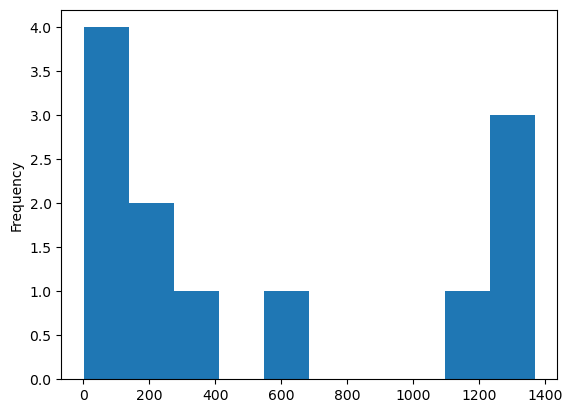

In [4]:
count = df.nunique()
count.plot.hist()

<AxesSubplot:ylabel='director'>

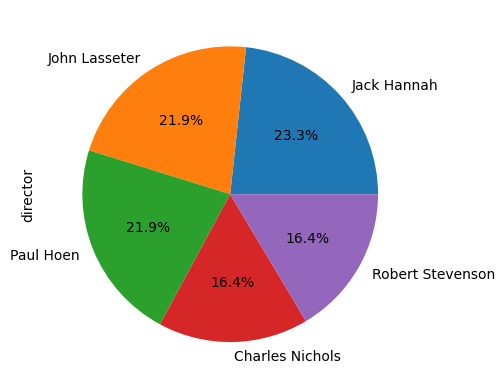

In [14]:
director = df.director.value_counts().head()
director.plot.pie(autopct='%0.1f%%')

<AxesSubplot:xlabel='duration'>

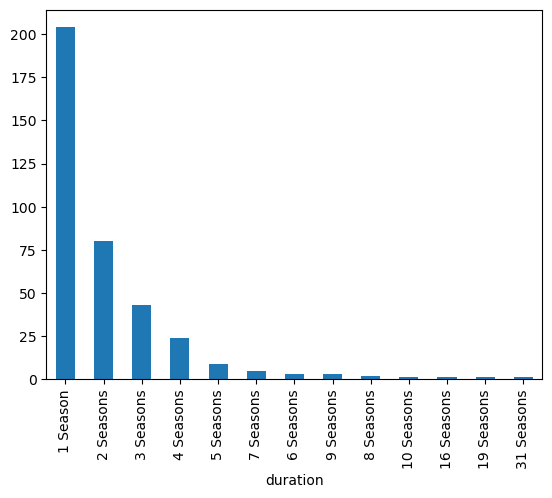

In [6]:
show = df[df['type'] == 'TV Show'].groupby(['duration']).size().sort_values(ascending=False)
show.plot.bar()

<AxesSubplot:xlabel='rating'>

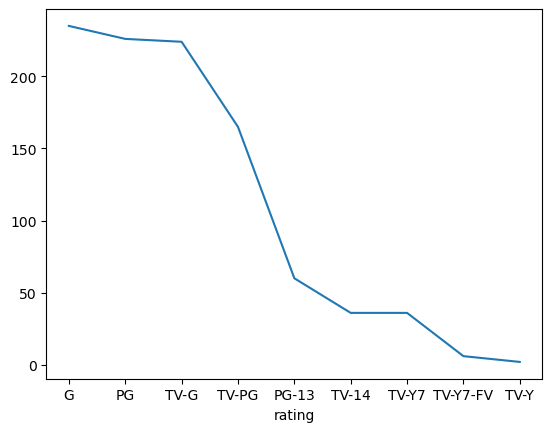

In [7]:
rating = df[df['type'] == 'Movie'].groupby(['rating']).size().sort_values(ascending=False)
rating.plot.line()

<AxesSubplot:ylabel='None'>

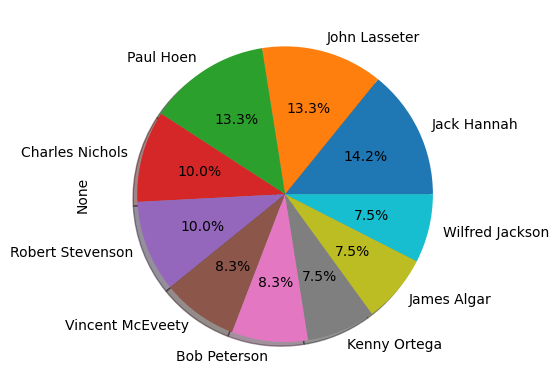

In [8]:
movie = df[df['type'] == 'Movie'].groupby(['director']).size().sort_values(ascending=False).head(10)
movie.plot.pie(autopct='%0.1f%%',shadow=True)

type
False    AxesSubplot(0.125,0.11;0.775x0.77)
True     AxesSubplot(0.125,0.11;0.775x0.77)
Name: release_year, dtype: object

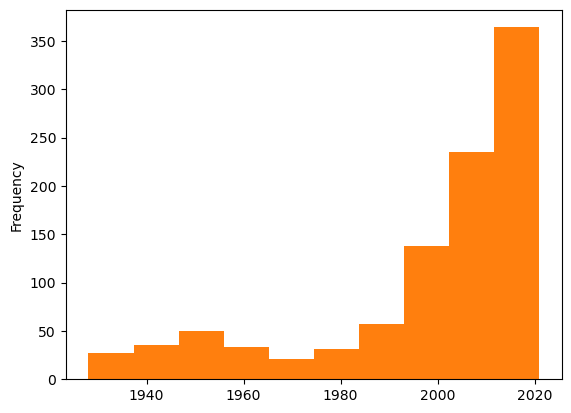

In [9]:
oldest = df['release_year'].sort_values().groupby([df['type'] == 'Movie'])
oldest.plot.hist()

<AxesSubplot:>

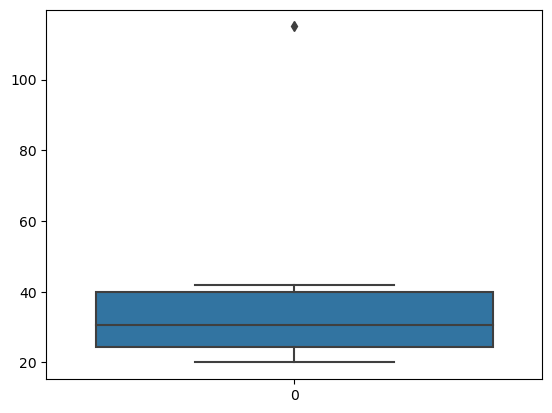

In [10]:
topcat = df[df['type'] == 'Movie'].groupby('listed_in').size().sort_values(ascending=False).head(10)
sns.boxplot(data=topcat)

<AxesSubplot:xlabel='country'>

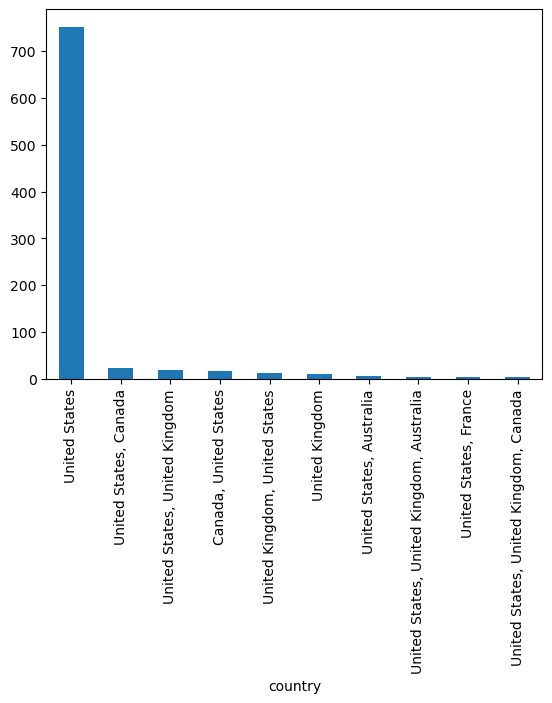

In [11]:
countries = df[df['type'] == 'Movie'].groupby('country').size().sort_values(ascending=False).head(10)
countries.plot.bar()

In [20]:
filt = (df['type'] == 'TV Show')
data = df.loc[filt,'duration'].value_counts()
data

1 Season      204
2 Seasons      80
3 Seasons      43
4 Seasons      24
5 Seasons       9
7 Seasons       5
9 Seasons       3
6 Seasons       3
8 Seasons       2
16 Seasons      1
19 Seasons      1
10 Seasons      1
31 Seasons      1
Name: duration, dtype: int64

In [21]:
filt = (df['type'] == 'Movie')
data = df.loc[filt,'rating'].value_counts()
data

G           235
PG          226
TV-G        224
TV-PG       165
PG-13        60
TV-14        36
TV-Y7        36
TV-Y7-FV      6
TV-Y          2
Name: rating, dtype: int64

In [26]:
filt = (df['type'] == 'Movie')
data = df.loc[filt,'director'].value_counts().head(10)
data

Jack Hannah         17
John Lasseter       16
Paul Hoen           16
Charles Nichols     12
Robert Stevenson    12
Bob Peterson        10
Vincent McEveety    10
Wilfred Jackson      9
James Algar          9
Kenny Ortega         9
Name: director, dtype: int64

<AxesSubplot:>

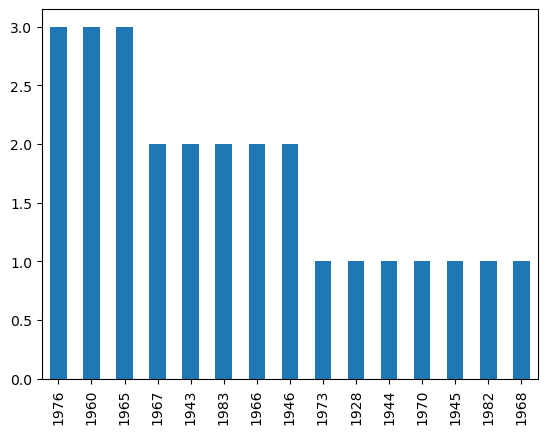

In [30]:
filt = (df['type'] == 'Movie')
data = df.loc[filt,'release_year'].value_counts().tail(15)
data.plot.bar()

In [40]:
filt = (df['type'] == 'Movie')
data = df.loc[filt,'listed_in'].value_counts().head(10)
data

Animation, Comedy, Family                115
Action-Adventure, Animation, Comedy       42
Action-Adventure, Animation, Family       40
Animals & Nature, Documentary, Family     40
Animals & Nature, Documentary             34
Action-Adventure, Comedy, Family          27
Animation, Family, Fantasy                26
Documentary                               24
Animation, Family                         23
Documentary, Historical                   20
Name: listed_in, dtype: int64

In [41]:
filt = (df['type'] == 'Movie')
data = df.loc[filt,'country'].value_counts().head(10)
data

United States                               752
United States, Canada                        23
United States, United Kingdom                18
Canada, United States                        16
United Kingdom, United States                13
United Kingdom                               11
United States, Australia                      7
United States, United Kingdom, Australia      4
United States, France                         4
United States, United Kingdom, Canada         3
Name: country, dtype: int64